## Imports

In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
!ls

Data
Final Notebook.ipynb
Notebooks
README.md


In [5]:
df2 = pd.read_csv('Data/UsableData.csv')
df2.head(100)

,Unnamed: 0,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
1,2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
2,6,H,7,NaN,00 00 05.41,+20 02 11.8,9.64,NaN,G,0.022549,...,NaN,NaN,NaN,NaN,B+19 5185,NaN,NaN,0.79,G0,S
3,7,H,8,NaN,00 00 06.55,+25 53 11.3,9.05,3.0,H,0.027292,...,NaN,G,P,224709.0,B+25 5054,NaN,NaN,4.82,M6e-M8.5e Tc,G
4,8,H,9,NaN,00 00 08.48,+36 35 09.4,8.59,NaN,H,0.035342,...,NaN,NaN,NaN,224708.0,B+35 5149,NaN,NaN,1.00,G5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,163,H,164,NaN,00 02 04.46,+59 56 24.0,7.98,NaN,H,0.518578,...,NaN,NaN,NaN,224940.0,B+59 2814,NaN,NaN,0.95,G9III,X
96,164,H,165,NaN,00 02 04.74,-22 19 38.9,10.16,NaN,H,0.519745,...,NaN,NaN,NaN,224962.0,NaN,C-23 18120,P-23 8372,1.04,Ap...,4
97,166,H,167,NaN,00 02 06.67,+39 10 59.6,8.58,NaN,H,0.527807,...,NaN,NaN,NaN,224957.0,B+38 5113,NaN,NaN,0.07,B9,S
98,167,H,168,NaN,00 02 08.05,-02 49 11.4,9.56,NaN,H,0.533522,...,NaN,NaN,NaN,224959.0,B-03 5751,NaN,NaN,1.08,R...,X


In [9]:
df = pd.read_csv('hipparcos-voidmain.csv')

In [10]:
df.head(15)

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2
5,H,6,NaN,00 00 04.35,+03 56 47.4,12.31,NaN,G,0.018141,3.946489,...,NaN,G,NaN,NaN,NaN,NaN,NaN,1.55,M0V:,S
6,H,7,NaN,00 00 05.41,+20 02 11.8,9.64,NaN,G,0.022549,20.036602,...,NaN,NaN,NaN,NaN,B+19 5185,NaN,NaN,0.79,G0,S
7,H,8,NaN,00 00 06.55,+25 53 11.3,9.05,3.0,H,0.027292,25.886474,...,NaN,G,P,224709.0,B+25 5054,NaN,NaN,4.82,M6e-M8.5e Tc,G
8,H,9,NaN,00 00 08.48,+36 35 09.4,8.59,NaN,H,0.035342,36.585938,...,NaN,NaN,NaN,224708.0,B+35 5149,NaN,NaN,1.00,G5,S
9,H,10,NaN,00 00 08.70,-50 52 01.5,8.59,NaN,H,0.036253,-50.867074,...,S,NaN,NaN,224717.0,NaN,C-51 13738,P-51 12065,0.51,F6V,2


In [11]:
df.columns

Index(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag',
       'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE',
       'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA',
       'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE',
       'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag',
       'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I',
       'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax',
       'HPmin', 'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
       'CPD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

## Dropping the nulls and making the target variable a binary column and make a copy of the dataset so that we have an unchanged base to refer to.

In [12]:
df=df.dropna(subset = ['HvarType'])

In [13]:
df['HvarType'].unique()

array(['C', 'P', 'D', 'U', 'R', 'M'], dtype=object)

In [14]:
df_2 = df.copy()

In [15]:
df_2.loc[df_2['HvarType'].isin(['P', 'D', 'U', 'R', 'M']), 'HvarType'] = 'S'

In [16]:
# df.loc[df['HvarType'].isin(['P', 'D', 'U', 'R', 'M']), 'HvarType'] = 'S'

In [17]:
X = df_2.drop(columns='HvarType')
y = df_2['HvarType']

In [18]:
df_2['HvarType'].value_counts()

C    46552
S    25070
Name: HvarType, dtype: int64

### Train test split, created preprocessor for our pipeline, created a list of only columns with numarical values.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [20]:
preprocessor = ColumnTransformer([
    ('SimpleImputer', SimpleImputer(strategy='median'), )
])

In [21]:
numCols = [col for col in x_train.columns if x_train[col].dtype in ['int64', 'float64']]
len(numCols)

51

In [22]:
x_train[numCols[1]]

16098      7.10
4709       7.12
71346      8.52
95181      9.47
101310    10.72
          ...  
60651     10.39
10574      9.52
90761      5.93
1483      11.26
25826      8.90
Name: Vmag, Length: 53716, dtype: float64

In [51]:
x_train

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
16098,H,16113,NaN,03 27 34.90,-39 52 50.0,7.10,1.0,H,51.895426,-39.880562,...,S,NaN,NaN,21586.0,NaN,C-40 929,P-40 318,1.52,K4III,2
4709,H,4713,NaN,01 00 32.75,+58 21 50.9,7.12,NaN,H,15.136462,58.364136,...,S,NaN,NaN,5813.0,B+57 179,NaN,NaN,0.18,A3,S
71346,H,71410,NaN,14 36 10.51,-03 46 51.7,8.52,NaN,H,219.043792,-3.781015,...,NaN,NaN,NaN,128273.0,B-03 3645,NaN,NaN,0.96,G8III,X
95181,H,95267,H,19 22 57.42,-01 44 26.0,9.47,NaN,H,290.739263,-1.740568,...,NaN,G,NaN,182034.0,B-01 3726,NaN,NaN,0.61,K5,G
101310,H,101400,NaN,20 33 00.68,+01 28 04.4,10.72,NaN,H,308.252851,1.467898,...,NaN,G,NaN,NaN,NaN,NaN,NaN,1.89,M0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,H,60704,NaN,12 26 29.83,+54 33 23.3,10.39,NaN,H,186.624290,54.556485,...,NaN,NaN,NaN,238120.0,B+55 1532,NaN,NaN,1.36,K2,S
10574,H,10583,NaN,02 16 12.87,-55 29 36.8,9.52,NaN,G,34.053624,-55.493564,...,NaN,NaN,NaN,14229.0,NaN,NaN,P-56 408,0.53,F6/F7Vw...,1
90761,H,90844,NaN,18 31 56.99,-01 00 10.7,5.93,NaN,G,277.987452,-1.002966,...,S,NaN,NaN,170920.0,B-01 3504,NaN,NaN,0.22,A4III,X
1483,H,1485,NaN,00 18 27.84,-35 18 43.5,11.26,NaN,G,4.615996,-35.312073,...,NaN,G,NaN,NaN,NaN,C-36 92,NaN,0.80,NaN,NaN


In [48]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [50]:
y_test

array([1, 0, 0, ..., 0, 1, 0])

#### Label encode to target; S(some type of varible) = 1 , C(not varible) = 0

In [24]:
lE = LabelEncoder()
lE.fit(y)
y_train = lE.transform(y_train)
y_test = lE.transform(y_test)

In [25]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

### Created a pipeline to use in a for loop that gets the accuracy, recall, f1-score, and roc-auc for every numarical column. 

In [26]:
lg = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('model',LogisticRegression(max_iter=5000, random_state=42))
    ])
# lg.fit(x_train[['HIP']], y_train)

In [27]:
pd.Series(y_train).value_counts()

0    34938
1    18778
dtype: int64

In [52]:
used_num_cols

['Vmag',
 'VarFlag',
 'pmDE',
 'e_RAdeg',
 'e_DEdeg',
 'e_Plx',
 'e_pmRA',
 'e_pmDE',
 'Plx:DE',
 'F1',
 'F2',
 'BTmag',
 'e_BTmag',
 'VTmag',
 'B-V',
 'e_B-V',
 'V-I',
 'e_V-I',
 'Hpmag',
 'e_Hpmag',
 'Hpscat',
 'o_Hpmag',
 'Hpmax',
 'HPmin',
 'Period',
 'moreVar',
 'Nsys',
 'Ncomp',
 'rho',
 'e_rho',
 'e_dHp',
 '(V-I)red']

In [61]:
used_num_cols = []
for col in numCols:
    lg = Pipeline(steps=[
        ('SimpleImputer', SimpleImputer(strategy='median')),
        ('model', LogisticRegression(max_iter=5000, random_state=42))  
    ])
    lg.fit(x_train[[col]], y_train)
    train_preds = lg.predict(x_train[[col]])
    test_preds = lg.predict(x_test[[col]])
    train_probs = lg.predict_proba(x_train[[col]])[:,1]
    test_probs = lg.predict_proba(x_test[[col]])[:,1]
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds, zero_division=0)
    test_recall = recall_score(y_test, test_preds, zero_division=0)
    train_precision = precision_score(y_train, train_preds, zero_division=0)
    test_precision = precision_score(y_test, test_preds, zero_division=0)
    train_f1 = f1_score(y_train, train_preds, zero_division=0)
    test_f1 = f1_score(y_test, test_preds, zero_division=0)
    train_rocauc = roc_auc_score(y_train, train_probs)
    test_rocauc = roc_auc_score(y_test, test_probs)
    print(col)
    if (train_accuracy > 0) and (test_accuracy > 0) and (train_recall > 0) and (test_recall > 0) and (train_precision > 0) and (test_precision > 0) and (train_f1 > 0) and (test_f1 > 0) and (train_rocauc > 0) and (test_rocauc > 0):
        used_num_cols.append(col)
        print(f'{col} added to used column list')
    print(F'\nTrain Accuracy:\t\t{train_accuracy}')
    print(F'Test Accuracy:\t\t{test_accuracy}')
    print(F"\nTrain Recall:\t\t{train_recall}")
    print(F'Test Recall:\t\t{test_recall}')
    print(F"\nTrain Precision:\t{train_precision}")
    print(F'Test Precision:\t\t{test_precision}')
    print(F"\nTrain f1:\t\t{train_f1}")
    print(F'Test f1:\t\t{test_f1}')
    print(F"\nTrain ROC-AUC:\t\t{train_rocauc}")
    print(F'Test ROC-AUC:\t\t{test_rocauc}')
    print('\n')
    print("****"*20)
    print('\n')

HIP

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.49096253710321636
Test ROC-AUC:		0.49019535851846385


********************************************************************************


Vmag
Vmag added to used column list

Train Accuracy:		0.6512770869014819
Test Accuracy:		0.6497263487099296

Train Recall:		0.0025029289594205987
Test Recall:		0.003178639542275906

Train Precision:	0.9791666666666666
Test Precision:		1.0

Train f1:		0.004993094656326358
Test f1:		0.0063371356147021544

Train ROC-AUC:		0.5400225289000143
Test ROC-AUC:		0.5422443083631775


********************************************************************************


VarFlag
VarFlag added to used column list

Train Accuracy:		0.7077034775485889
Test Accuracy:		0.7064112587959344

Train Recall:		0.16386196613057832
Test Recall:		0.16449459631277813

Train Precis

pmDE:pmRA

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.6486094046688261

Train Recall:		0.0
Test Recall:		0.0

Train Precision:	0.0
Test Precision:		0.0

Train f1:		0.0
Test f1:		0.0

Train ROC-AUC:		0.5054475750696237
Test ROC-AUC:		0.5073448632867517


********************************************************************************


F1
F1 added to used column list

Train Accuracy:		0.669707349765433
Test Accuracy:		0.6721210767340556

Train Recall:		0.17179678347001812
Test Recall:		0.1821360457724094

Train Precision:	0.595642540620384
Test Precision:		0.6125066809192945

Train f1:		0.26667768868314456
Test f1:		0.28077912532157295

Train ROC-AUC:		0.635284823367189
Test ROC-AUC:		0.6438489027918712


********************************************************************************


F2
F2 added to used column list

Train Accuracy:		0.6531759624692829
Test Accuracy:		0.6508991399530883

Train Recall:		0.010544253914154863
Test Recall:		0.009853782581055308

Train Precision

Nsys
Nsys added to used column list

Train Accuracy:		0.6859036413731476
Test Accuracy:		0.6862504188540154

Train Recall:		0.11375013313451912
Test Recall:		0.11904005085823267

Train Precision:	0.9027895181741336
Test Precision:		0.9089805825242718

Train f1:		0.20204313280363226
Test f1:		0.21051152332771217

Train ROC-AUC:		0.5535703132651196
Test ROC-AUC:		0.5562785055325407


********************************************************************************


Ncomp
Ncomp added to used column list

Train Accuracy:		0.7652654702509495
Test Accuracy:		0.7635987937004356

Train Recall:		0.3629246991159868
Test Recall:		0.36363636363636365

Train Precision:	0.9134164321136576
Test Precision:		0.9090186730234406

Train f1:		0.5194557719425282
Test f1:		0.5194687251674424

Train ROC-AUC:		0.672272049848954
Test ROC-AUC:		0.6719954288787752


********************************************************************************


theta

Train Accuracy:		0.6504207312532578
Test Accuracy:		0.64860

In [56]:
logreg = LogisticRegression()
logreg.fit(x_train[[col]], y_train)
# x_train = logreg.transform(x_train[[col]])
# x_test = logreg.transform(x_test)

LogisticRegression()

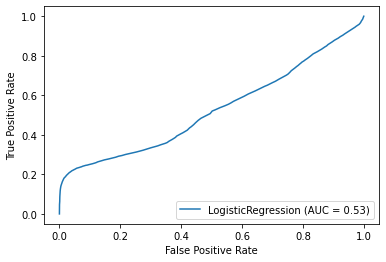

In [57]:
plot_roc_curve(logreg, x_train[[col]], y_train);

In [64]:
cv_results = cross_validate(logreg, x_train[[col]], y_train, scoring='roc_auc')
cv_results

{'fit_time': array([0.02393389, 0.03490734, 0.03319597, 0.02234387, 0.02166438]),
 'score_time': array([0.00498581, 0.00498772, 0.0050447 , 0.0040288 , 0.00503039]),
 'test_score': array([0.52495686, 0.52862354, 0.5250517 , 0.52448274, 0.53008052])}

In [ ]:
0. Catalog ( Catalog_Name ) - Catalogue (H=Hipparcos) 
1. HIP ( HIP_Number ) - Identifier (HIP number) 
2. Proxy ( Prox_10asec ) - Proximity flag 
3. RAhms ( RA ) - RA in h m s, ICRS (J1991.25) 
4. DEdms ( Dec ) - Dec in deg ' ", ICRS (J1991.25) 
5. Vmag ( Vmag ) - Magnitude in Johnson V 
6. VarFlag ( Var_Flag ) - Coarse variability flag 
7. r_Vmag ( Vmag_Source ) - Source of magnitude 
8. RAdeg ( RA_Deg ) - RA in degrees (ICRS, Epoch-J1991.25) 
9. DEdeg ( Dec_Deg ) - Dec in degrees (ICRS, Epoch-J1991.25) 
10. AstroRef ( Astrom_Ref_Dbl ) - Reference flag for astrometry 
11. Plx ( Parallax ) - Trigonometric parallax 
12. pmRA ( pm_RA ) - Proper motion in RA 
13. pmDE ( pm_Dec ) - Proper motion in Dec 
14. e_RAdeg ( RA_Error ) - Standard error in RA*cos(Dec_Deg) 
15. e_DEdeg ( Dec_Error ) - Standard error in Dec_Deg 
16. e_Plx ( Parallax_Error ) - Standard error in Parallax 
17. e_pmRA ( pm_RA_Error ) - Standard error in pmRA 
18. e_pmDE ( pm_Dec_Error ) - Standard error in pmDE 
19. DE:RA ( Crl_Dec_RA ) - (DE over RA)xCos(delta) 
20. Plx:RA ( Crl_Plx_RA ) - (Plx over RA)xCos(delta) 
21. Plx:DE ( Crl_Plx_Dec ) - (Plx over DE) 
22. pmRA:RA ( Crl_pmRA_RA ) - (pmRA over RA)xCos(delta) 
23. pmRA:DE ( Crl_pmRA_Dec ) - (pmRA over DE) 
24. pmRA:Plx ( Crl_pmRA_Plx ) - (pmRA over Plx) 
25. pmDE:RA ( Crl_pmDec_RA ) - (pmDE over RA)xCos(delta) 
26. pmDE:DE ( Crl_pmDec_Dec ) - (pmDE over DE) 
27. pmDE:Plx ( Crl_pmDec_Plx ) - (pmDE over Plx) 
28. pmDE:pmRA ( Crl_pmDec_pmRA ) - (pmDE over pmRA) 
29. F1 ( Reject_Percent ) - Percentage of rejected data 
30. F2 ( Quality_Fit ) - Goodness-of-fit parameter 
31. --- ( HIP_Number_repeat ) - HIP number (repetition) 
32. BTmag ( BT_Mag ) - Mean BT magnitude 
33. e_BTmag ( BT_Mag_Error ) - Standard error on BTmag 
34. VTmag ( VT_Mag ) - Mean VT magnitude 
35. e_VTmag ( VT_Mag_Error ) - Standard error on VTmag 
36. m_BTmag ( BT_Mag_Ref_Dbl ) - Reference flag for BT and VTmag 
37. B-V ( BV_Color ) - Johnson BV colour 
38. e_B-V ( BV_Color_Error ) - Standard error on BV 
39. r_B-V ( BV_Mag_Source ) - Source of BV from Ground or Tycho 
40. V-I ( VI_Color ) - Colour index in Cousins' system 
41. e_V-I ( VI_Color_Error ) - Standard error on VI 
42. r_V-I ( VI_Color_Source ) - Source of VI 
43. CombMag ( Mag_Ref_Dbl ) - Flag for combined Vmag, BV, VI 
44. Hpmag ( Hip_Mag ) - Median magnitude in Hipparcos system 
45. e_Hpmag ( Hip_Mag_Error ) - Standard error on Hpmag 
46. Hpscat ( Scat_Hip_Mag ) - Scatter of Hpmag 
47. o_Hpmag ( N_Obs_Hip_Mag ) - Number of observations for Hpmag 
48. m_Hpmag ( Hip_Mag_Ref_Dbl ) - Reference flag for Hpmag 
49. Hpmax ( Hip_Mag_Max ) - Hpmag at maximum (5th percentile) 
50. HPmin ( Hip_Mag_Min ) - Hpmag at minimum (95th percentile) 
51. Period ( Var_Period ) - Variability period (days) 
52. HvarType ( Hip_Var_Type ) - Variability type 
53. moreVar ( Var_Data_Annex ) - Additional data about variability 
54. morePhoto ( Var_Curv_Annex ) - Light curve Annex 
55. CCDM ( CCDM_Id ) - CCDM identifier 
56. n_CCDM ( CCDM_History ) - Historical status flag 
57. Nsys ( CCDM_N_Entries ) - Number of entries with same CCDM 
58. Ncomp ( CCDM_N_Comp ) - Number of components in this entry 
59. MultFlag ( Dbl_Mult_Annex ) - Double and or Multiple Systems flag 
60. Source ( Astrom_Mult_Source ) - Astrometric source flag 
61. Qual ( Dbl_Soln_Qual ) - Solution quality flag 
62. m_HIP ( Dbl_Ref_ID ) - Component identifiers 
63. theta ( Dbl_Theta ) - Position angle between components 
64. rho ( Dbl_Rho ) - Angular separation of components 
65. e_rho ( Rho_Error ) - Standard error of rho 
66. dHp ( Diff_Hip_Mag ) - Magnitude difference of components 
67. e_dHp ( dHip_Mag_Error ) - Standard error in dHp 
68. Survey ( Survey_Star ) - Flag indicating a Survey Star 
69. Chart ( ID_Chart ) - Identification Chart 
70. Notes ( Notes ) - Existence of notes 
71. HD ( HD_Id ) - HD number (III 135) 
72. BD ( BD_Id ) - Bonner DM (I 119), (I 122) 
73. CoD ( CoD_Id ) - Cordoba Durchmusterung (DM) (I 114) 
74. CPD ( CPD_Id ) - Cape Photographic DM (I 108) 
75. (V-I)red ( VI_Color_Reduct ) - VI used for reductions 
76. SpType ( Spect_Type ) - Spectral type 
77. r_SpType ( Spect_Type_Source ) - Source of spectral type 